In [18]:
import pandas as pd
df = pd.read_csv(r'C:\Users\DELL\Desktop\merged_dataset.csv')

In [20]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')

In [22]:
print(df.columns)

Index(['Transaction_ID', 'Company_ID', 'Product_ID', 'Quantity',
       'Transaction_Date', 'Product_Price_x', 'Total_Cost', 'Recency',
       'Purchase_Frequency', 'Total_Spending', 'Product_Name',
       'Product_Price_y', 'Price_Range', 'Company_Name', 'Company_Profit',
       'Address', 'Profitability_Category', 'Region'],
      dtype='object')


In [24]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

In [26]:
df = df.sort_values('Transaction_Date')
df.set_index('Transaction_Date', inplace=True)
df_target = df['Total_Spending']  

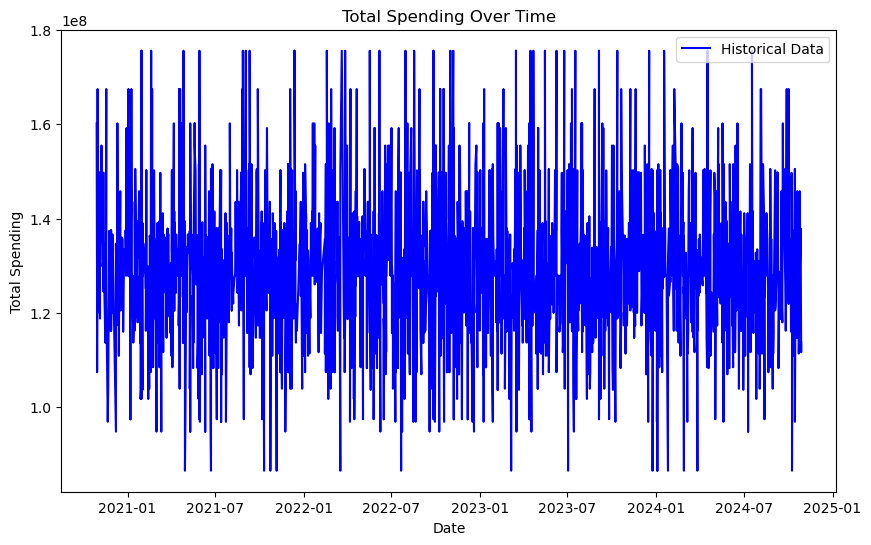

In [28]:
import matplotlib.pyplot as plt

# Make sure you're using the datetime index for plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total_Spending'], label='Historical Data', color='blue')
plt.title('Total Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.legend()
plt.show()

In [30]:
import statsmodels.api as sm

sarima_model = sm.tsa.statespace.SARIMAX(df['Total_Spending'],
                                         order=(1, 1, 1),
                                         seasonal_order=(1, 1, 1, 12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)

sarima_result = sarima_model.fit(disp=False)

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [32]:
forecast_steps = 10
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='M')[1:]

C:\Users\DELL\AppData\Local\Temp\ipykernel_23664\1982102102.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='M')[1:]


NameError: name 'pm' is not defined